In [1]:
import pickle

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
import os
print(os.path.isdir('./cifar-10-python')) 

True


In [10]:
byte_dict = unpickle('./cifar-10-python/cifar-10-batches-py/data_batch_1')

data_dict = {key.decode('utf-8') if isinstance(key, bytes) else key:value for key, value in byte_dict.items()}

In [13]:
data_dict.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [18]:
test = data_dict['data'][0]

In [ ]:
import torch
test_torch = torch.from_numpy(test)

In [45]:
# Reshape to (3, 32, 32) for PyTorch format
image = test.reshape(3, 32, 32)

# Convert to Torch tensor
image_tensor = torch.tensor(image, dtype=torch.float32) / 255.0  # Normalize to [0,1]

# Convert to (H, W, C) format for matplotlib
image_permuted = image_tensor.permute(1, 2, 0)  # (32, 32, 3)

In [46]:
image_permuted.shape

torch.Size([32, 32, 3])

In [47]:
import torch
test_torch_reshape = torch.reshape(test_torch, (32,32,3))

[]

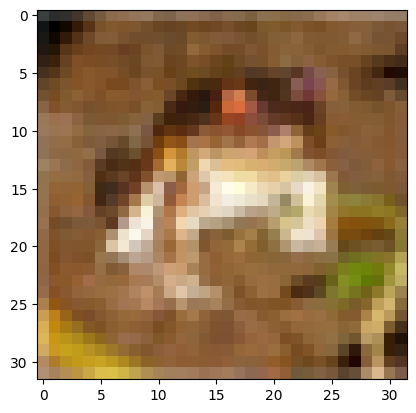

In [48]:
import cv2 as cv
import matplotlib.pyplot as plt

plt.imshow(image_permuted)
plt.plot()

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


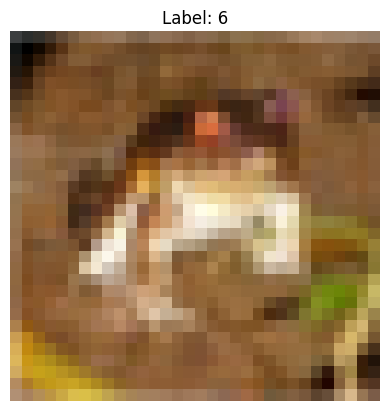

In [49]:
# Extract one image (First image in batch)
image_flat = data_dict['data'][0]  # Shape: (3072,)

# Reshape to (3, 32, 32) - PyTorch format (C, H, W)
image = image_flat.reshape(3, 32, 32)

# Convert to PyTorch tensor and normalize to [0,1]
image_tensor = torch.tensor(image, dtype=torch.float32) / 255.0  

# Convert from (C, H, W) → (H, W, C) for Matplotlib
image_permuted = image_tensor.permute(1, 2, 0).numpy()  

# Display the image with `nearest` interpolation for sharpness
plt.imshow(image_permuted, interpolation='nearest')  
plt.axis("off")
plt.title(f"Label: {data_dict['labels'][0]}")
plt.show()

In [50]:
train_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
test_files = ['test_batch']

In [66]:
from torch.utils.data import Dataset, DataLoader
from typing import List
class  CustomDataset(Dataset):
    def __init__(self, files: List[str]):
        super().__init__()
        self.files = files
        self.images = []
        self.labels = []

        for file in self.files:
            byte_dict = unpickle(f'./cifar-10-python/cifar-10-batches-py/{file}')
            data_dict = {key.decode('utf-8') if isinstance(key, bytes) else key:value for key, value in byte_dict.items()}
            images = data_dict['data'].reshape(-1,3,32,32)
            #images = torch.tensor(images, dtype = torch.float32)
            images = torch.tensor(images, dtype=torch.float32) / 255.0
            labels = data_dict['labels']
            labels = torch.tensor(labels)


            self.images.append(images)
            self.labels.append(labels)
        
        self.images = torch.vstack(self.images)
        self.labels = torch.hstack(self.labels)
    # def transform(self):
    #     for file in self.files:
    #         byte_dict = unpickle(f'./cifar-10-python/cifar-10-batches-py/{file}')
    #         data_dict = {key.decode('utf-8') if isinstance(key, bytes) else key:value for key, value in byte_dict.items()}
    #         for 
    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]
        return image, label
        
    def __len__(self):
        return len(self.images)

In [69]:
train_dataset = CustomDataset(train_files)
test_dataset = CustomDataset(test_files)

In [71]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True)

In [72]:
next(iter(train_dataloader))

[tensor([[[[0.4745, 0.6039, 0.8784,  ..., 0.6667, 0.7176, 0.7725],
           [0.8667, 0.8667, 0.8196,  ..., 0.9255, 0.8510, 0.7529],
           [0.8588, 0.6745, 0.4745,  ..., 0.7608, 0.7412, 0.6902],
           ...,
           [0.6627, 0.5725, 0.5569,  ..., 0.5529, 0.5020, 0.5725],
           [0.6353, 0.5020, 0.3725,  ..., 0.6353, 0.5725, 0.5020],
           [0.6745, 0.6314, 0.5294,  ..., 0.6824, 0.6118, 0.4627]],
 
          [[0.3412, 0.5137, 0.8157,  ..., 0.5412, 0.5843, 0.6392],
           [0.7647, 0.7725, 0.7255,  ..., 0.8235, 0.7333, 0.6353],
           [0.7686, 0.5647, 0.3490,  ..., 0.6157, 0.5922, 0.5373],
           ...,
           [0.5098, 0.4235, 0.4196,  ..., 0.3961, 0.3725, 0.4275],
           [0.4784, 0.3569, 0.2392,  ..., 0.4745, 0.4353, 0.3490],
           [0.5137, 0.4824, 0.4000,  ..., 0.5176, 0.4706, 0.3059]],
 
          [[0.1843, 0.3882, 0.7137,  ..., 0.4039, 0.4431, 0.4980],
           [0.6627, 0.6706, 0.6196,  ..., 0.7176, 0.6235, 0.5216],
           [0.6980, 0.46

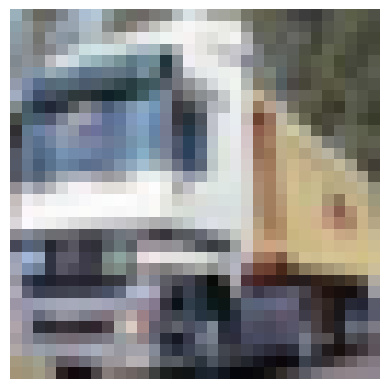

In [70]:
sample_test = train_dataset[1][0]
# Convert from (C, H, W) → (H, W, C) for Matplotlib
image_permuted = sample_test.permute(1, 2, 0).numpy()  

# Display the image with `nearest` interpolation for sharpness
plt.imshow(image_permuted, interpolation='nearest')  
plt.axis("off")
#plt.title(f"Label: {data_dict['labels'][0]}")
plt.show()